# Plots observed vs. predicted 16-fraction RT Heatmaps

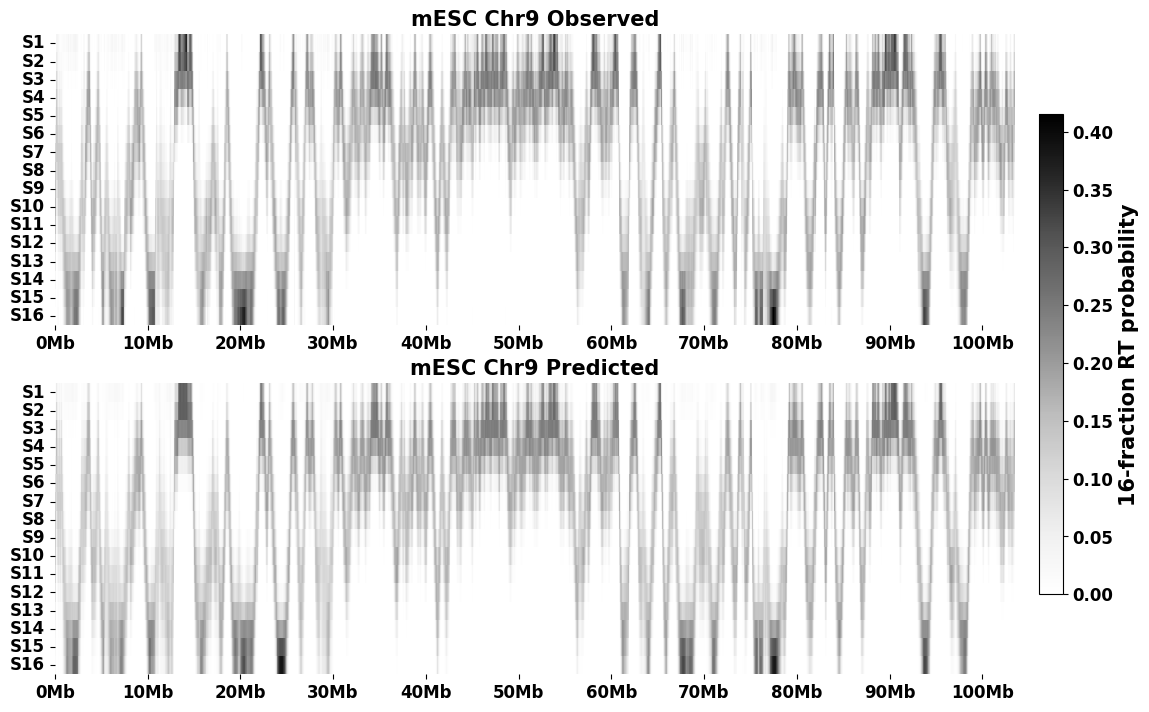

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

""" Specify these paths """
# The true 16-fraction RT labels file (.npz file)
path_to_labels_file = ""

# The predicted 16-fraction RT file (.npy)
path_to_predicted_file = ""

# Load data
chrom = '9' # chromosome
cell_line = 'mESC'
labels = np.load(path_to_labels_file)
obv = labels["9"]
pred = np.load(path_to_predicted_file)
obv = obv.T
pred = pred.T

yticks = [f'S{i}' for i in range(1, 17)]
title_font_size = 15
ticks_font_size = 12

# Calculate x-tick positions for every 10mb
bin_size = 50e3  # 50 kb per bin
tick_interval = 10e6  # 10 mb interval
num_bins = obv.shape[1]

# Calculate the tick positions (in terms of columns)
tick_positions = np.arange(0, num_bins, tick_interval // bin_size)

# Corresponding labels for the x-ticks (in Mb)
tick_labels = [f"{int(i * bin_size / 1e6)}Mb" for i in tick_positions]

# Set up figure and axes
fig, axes = plt.subplots(2, 1, 
                         figsize=(12, 8)
                        )

# Plot heatmaps
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # Position for the single colorbar
vmin, vmax = min(obv.min(), pred.min()), max(obv.max(), pred.max())

sns.heatmap(obv, cmap="Greys", ax=axes[0], cbar=False, yticklabels=yticks, vmin=vmin, vmax=vmax)
axes[0].set_title(f"{cell_line} Chr{chrom} Observed", fontsize=title_font_size, fontweight='bold')
axes[0].set_yticks(np.arange(obv.shape[0]) + 0.5)
axes[0].set_yticklabels(yticks, rotation=0, fontweight='bold', fontsize=ticks_font_size)
# axes[0].set_xticks([])  # Remove x-axis labels
axes[0].set_xticks(tick_positions)  # Set x-tick positions
axes[0].set_xticklabels(tick_labels, fontweight='bold', fontsize=ticks_font_size)  # Set x-tick labels
axes[0].tick_params(axis="x", rotation=0)  # Rotate labels for clarity

sns.heatmap(pred, cmap="Greys", ax=axes[1], cbar=False, yticklabels=yticks, vmin=vmin, vmax=vmax)
axes[1].set_title(f"{cell_line} Chr{chrom} Predicted", fontsize=title_font_size, fontweight='bold')
axes[1].set_yticks(np.arange(pred.shape[0]) + 0.5)
axes[1].set_yticklabels(yticks, rotation=0, fontweight='bold', fontsize=ticks_font_size)
# axes[1].set_xticks([])  # Remove x-axis labels
axes[1].set_xticks(tick_positions)  # Set x-tick positions
axes[1].set_xticklabels(tick_labels, fontweight='bold', fontsize=ticks_font_size)  # Set x-tick labels
axes[1].tick_params(axis="x", rotation=0)  # Rotate labels for clarity

# Add single colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap="Greys", norm=plt.Normalize(vmin=vmin, vmax=vmax)),
             cax=cbar_ax)
cbar.set_label("16-fraction RT probability", fontweight='bold', fontsize=title_font_size)
from matplotlib import font_manager

# Define bold font properties
bold_font = font_manager.FontProperties(weight='bold', size=12)  # Adjust 'size' as needed

# Set the tick labels to bold
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(bold_font)

# Adjust layout manually with reduced spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.2)
# Display plots
plt.show()
